# 📦 Import Libraries

In [6]:
import os

In [7]:
import networkx as nx
import osmnx as ox

In [8]:
import matplotlib.pyplot as plt

# 💾 Data Acquisition

In [9]:
PLACE = "Natal, Rio Grande do Norte, Brazil"
GRAPH_NAME = "map.osm.xml"

G = ox.graph_from_place(PLACE, network_type="drive")
G_projected = ox.project_graph(G)

In [10]:
plot_size = (12, 6)

graph_colors = {
  "black": "#1F1E1F",
  "blue": "#03A9CE",
}

text_colors = {
  "title": "#262626",
  "subtitle": "#646464",
}

fig_path = "./figures/"
files_path = "./files/"

if not os.path.exists(fig_path):
    os.makedirs(fig_path)

if not os.path.exists(files_path):
    os.makedirs(files_path)

# 🧩 Data Modelling

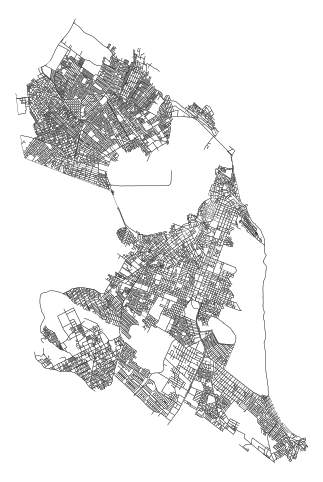

In [11]:
fig, ax = ox.plot_graph(
    G,
    figsize=plot_size,
    node_size=0,
    edge_color=graph_colors["black"],
    bgcolor="white",
    edge_linewidth=0.2
)

fig.savefig(f"{fig_path}map_graph_network.png", dpi=300, bbox_inches="tight")

In [12]:
CUSTOM_ROUTE = [
    (-35.22074600, -5.820143000),
    (-35.21595605, -5.812192060),
    (-35.21110018, -5.813623130),
    (-35.20746110, -5.804566941),
    (-35.20355062, -5.794003606)
]

nodes = [ox.distance.nearest_nodes(G, lon, lat) for lon, lat in CUSTOM_ROUTE]

routes = []

for idx in range(len(nodes) - 1):
    route = nx.shortest_path(G, nodes[idx], nodes[idx + 1], weight="length")
    routes += route

final_route = []

for idx in range(len(routes) - 1):
    if G.has_edge(routes[idx], routes[idx + 1]):
        final_route.append(routes[idx])

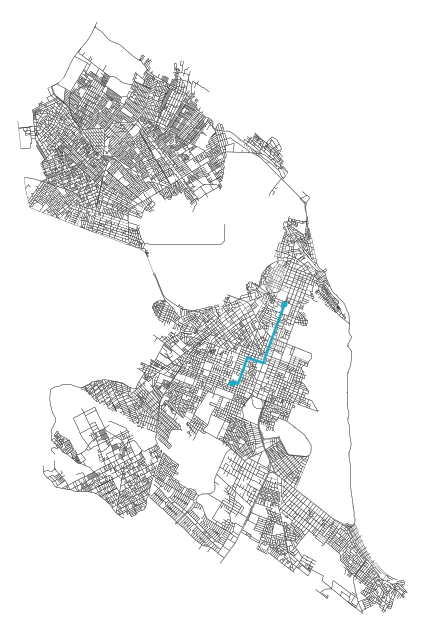

In [13]:
fig, ax = ox.plot_graph_route(
    G,
    final_route,
    route_linewidth=2,
    node_size=0,
    edge_color=graph_colors["black"],
    route_color=graph_colors["blue"],
    route_alpha=0.8,
    bgcolor="white",
    edge_linewidth=0.2,
    orig_dest_size=20
)

fig.savefig(f"{fig_path}map_graph_network_with_route.png", dpi=300, bbox_inches="tight")

In [14]:
ox.io.save_graph_xml(G_projected, f"{files_path}{GRAPH_NAME}")
os.system(f"netconvert --osm {files_path}{GRAPH_NAME} --o {files_path}map.net.xml")

c:\Users\Paulo Eduardo\miniconda3\envs\biofuel_analysis\Lib\site-packages\osmnx\io.py:368: UserWarning: For the `save_graph_xml` function to behave properly, the graph must have been created with `ox.settings.all_oneway=True`.
  osm_xml._save_graph_xml(


1